## Department of Computer Science, University of York
### DATA: Introduction to Data Science

# Task 1: Domain Analysis  (5 marks)

Given the business domain and the data overview presented (in the assessment paper), provide a brief description of

* the business problem and its significance to the relevant sector;
* the link between the business problem and the field of data science;
* the main areas of investigation; and
* potential ideas and solutions.


**Word Limit:** 300 words

## Business problem 

The business domain for this analysis is Healthcare, especifically focusing on the operations of the National Health Service (NHS) in the UK. The NHS collects and manages a wide range of unnormalised data. Inefficient handling of healthcare operations data, including appointments, surgeries, tests, billing and prescription, can lead to missed or delayed appointments, billing errors, overbooking of services and underutilization of healthcare resources. Without data processing valuable hidden insights related to patient care, operational efficiency, and resource allocation may be missed. 

## Application of Data Science

This business problem is directly linked to the field of Data Science, as it provides tools and techniques for data cleaning, integrating, explorating, and predicting.It also allows us to summarise data and make statistical conclusions. We can combine information from multiple like patient records, appointments, and billing records to create a comprehensive view of the healthcare system.These recorded data can be used to predict outcomes, identify trends and make informed decisions.

## The main areas of investigation and appropriate solutions 

1. Inconsistency in Healthcare Data -  Through database normalization we can eliminate redundancy and maintain data integrity. Entity separation and normalization ensures data is limited to authorised individuals.

2. Exploring relationship between attributes that are not explicitly linked - By applying Inferential statistical methods we can uncover hidden relationships and draw conclusions in patient populations by analysing data samples.

3. Patterns in service usage and patient behaviour - By applying unsupervised learning such as clustering we can find hidden patterns in how patients use services and how their behaviour changes depending on factors such as which hospital they visit, their age, and other demongraphic information. 

4. Prediction of patient outcomes - By using supervised learning models such as regression and classification we can predict appointment no-shows, clinical outcomes, billing amounts, approval of insurance claims.


# Task 2: Database Design (30 marks)


(**10 marks**) Design a conceptual database schema for the given NHS context, represented as an entity-relationship (ER) diagram using Chen's notation (as taught in the module). Your ER diagram should capture all the essential entities, attributes, primary keys, relationships, and cardinalities, necessary to model the healthcare operations described in the scenario.   

The healthcare data currently exists in the form of six csv files called  *Appointments\_Data.csv, Prescription\_Billing\_Insurance\_Data.csv, Service\_Billing\_Insurance\_Data.csv, Medical\_Appointments\_Data.csv, Medical\_Surgeries\_Data.csv and Medical\_Tests\_Data.csv*, provided on VLE (*path given in page 6 in the assessment paper*). These files have all the existing records. The tables available in the csv files are unnormalised. The information about the different columns in them is given in Tables 1-6 (in the paper), respectively.

(**10 marks**) Normalise the provided tables to the Third Normal Form (3NF), minimising data redundancy and ensuring data integrity. Demonstrate the steps involved in achieving 3NF, showing how you decomposed the tables through 1NF and 2NF. 

(**10 marks**) Finally, implement your 3NF schema in an SQLite database using SQL.
Your answer should include the SQL statements needed to accomplish this step and populate the final tables with the appropriate data. 

Your submission should include the final SQLite database file. 

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* The designated primary and foreign keys, existing relationships, and identified functional dependencies;
* The steps followed and justifications for the decisions made.
 
**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code/SQL statements or figures.

# Entity-Relationship diagram

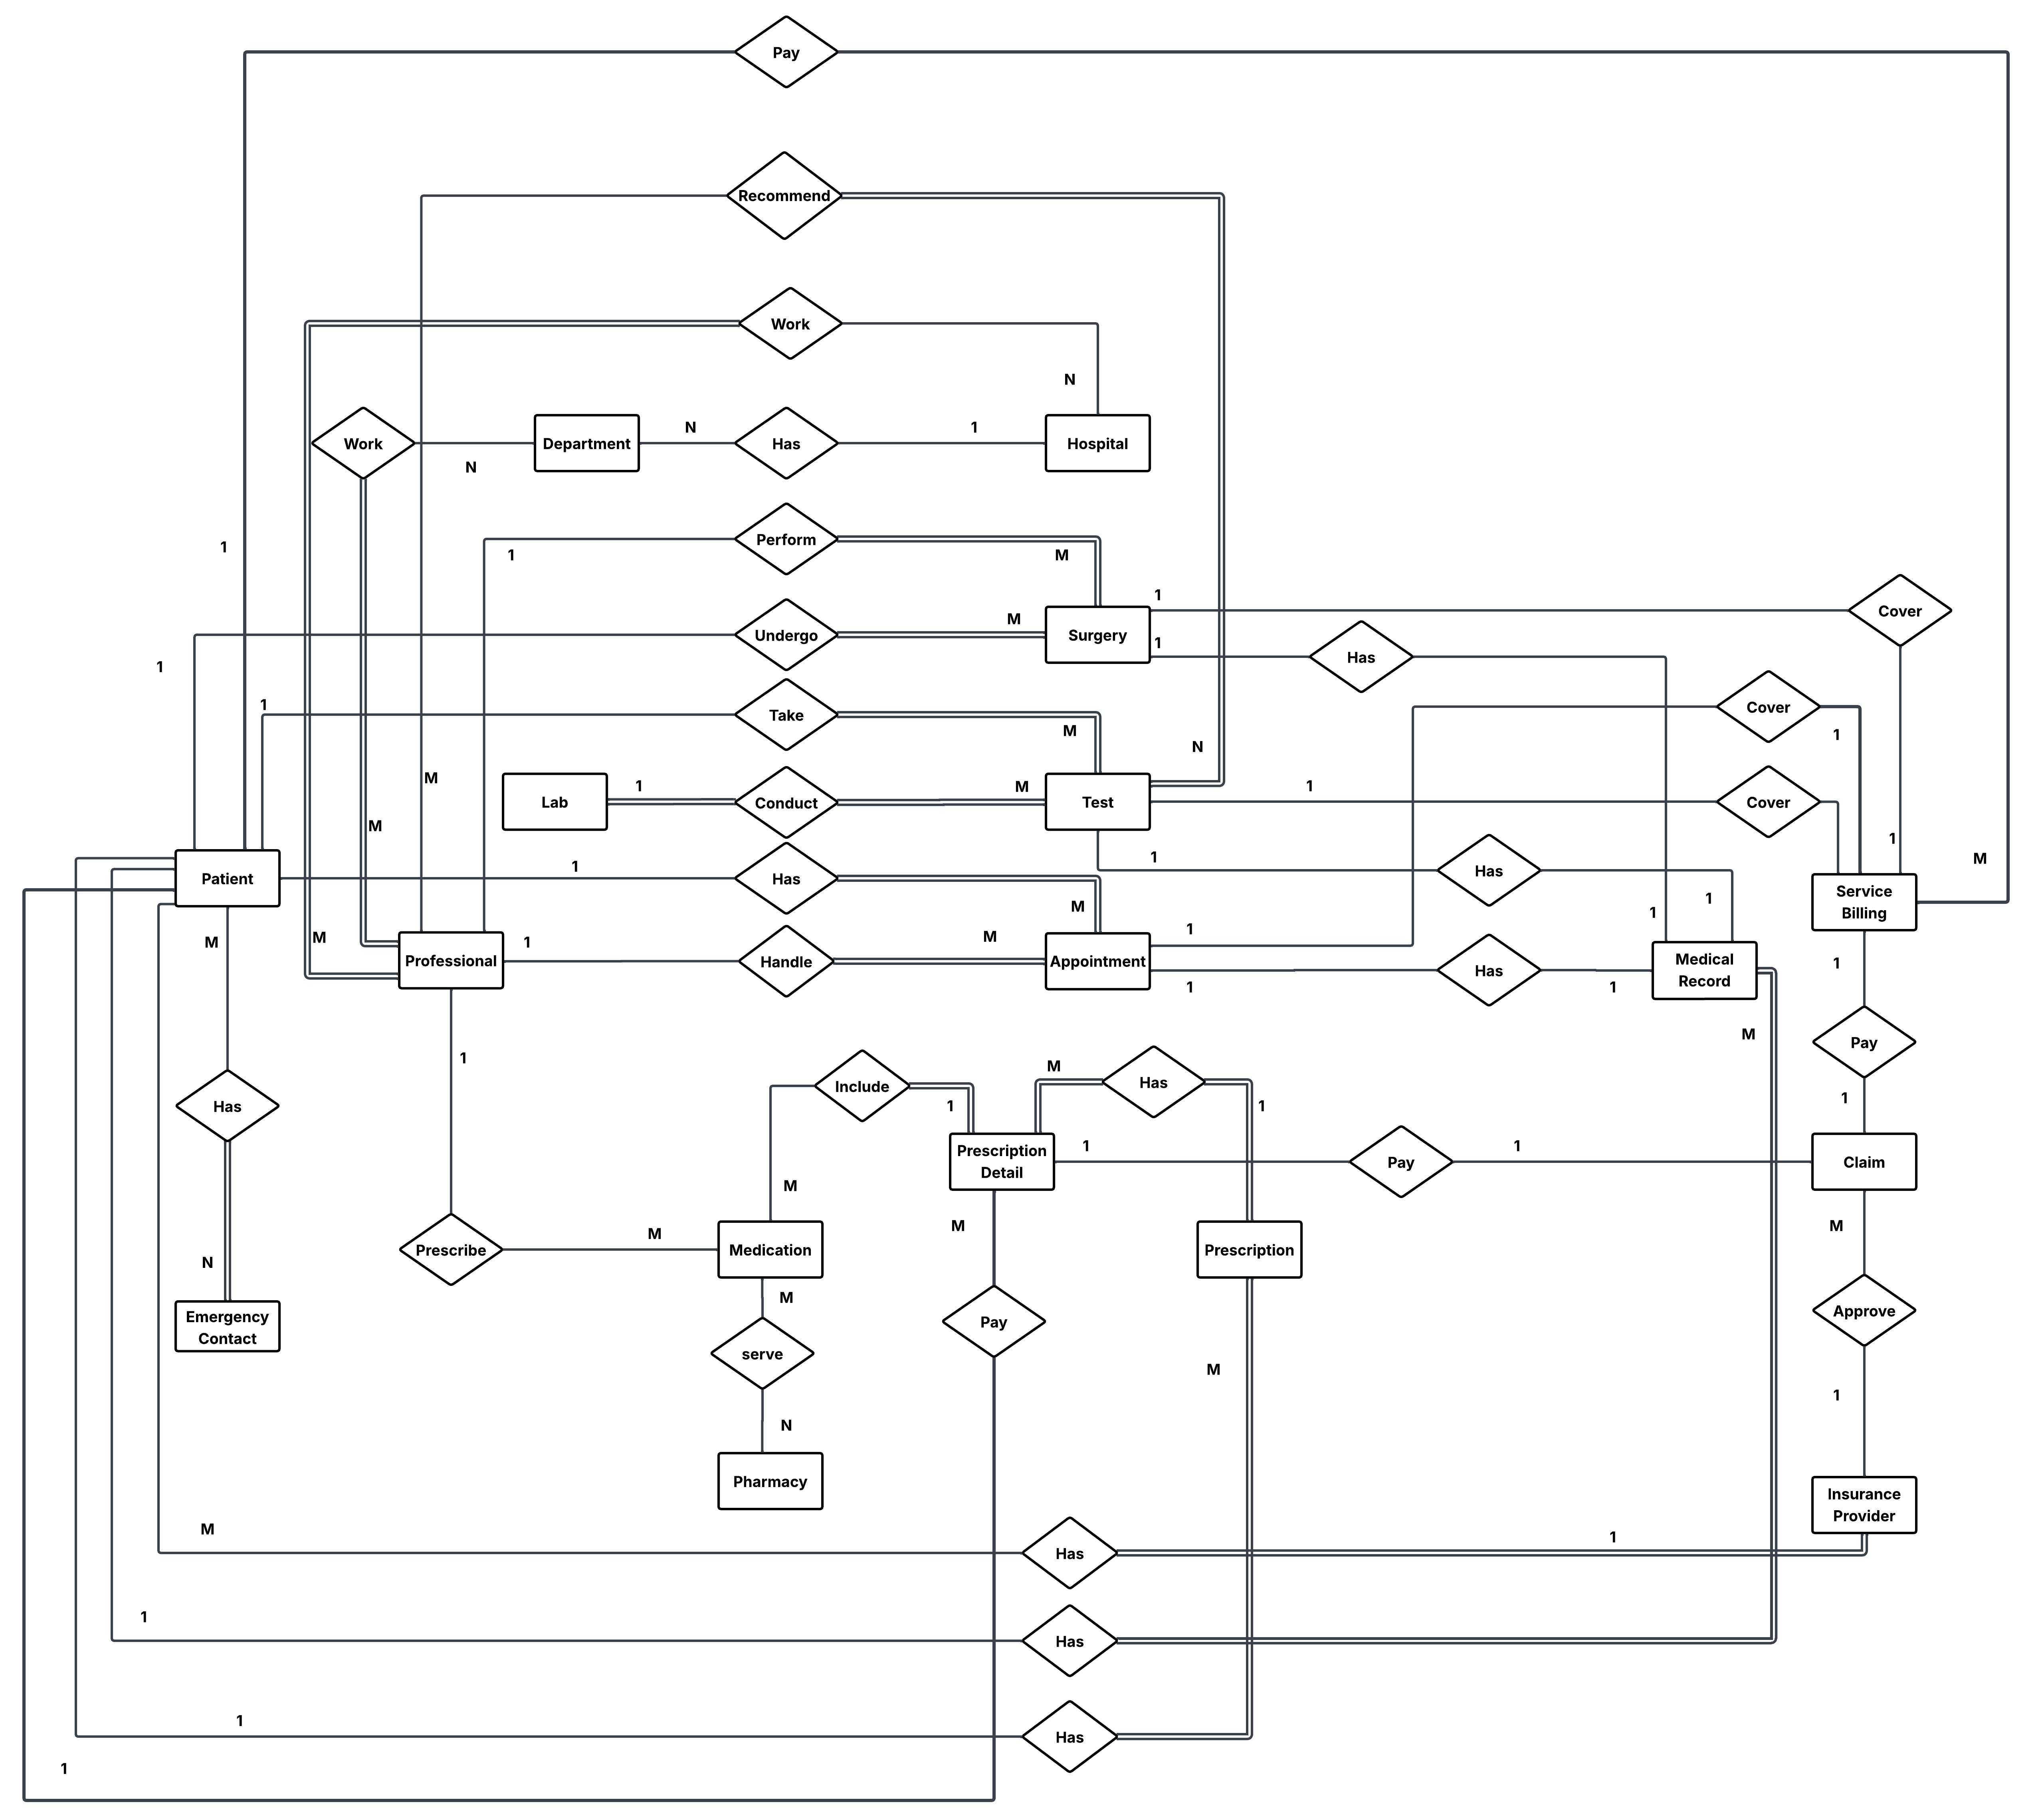

In [44]:
from IPython.display import Image
Image(filename='ER-Diagram.png')


### Entities and thier attributes listed (Primary Keys underlined) 

* **Patient**: (<ins>patientID</ins>, patientName, dateOfBirth, patientGender, patientAddress)
  
* **Appointment** : (<ins>appointmentID</ins>, appointmentDate, appointmentTime, departmentID, appointmentStatus)
* **Insurance Provider**: (<ins>insuranceProviderID</ins>, insuranceProviderName, contactNumber, coverageType)
* **Claim** : (<ins>claimID</ins>, claimStatus, claimStatusReason,amountClaimed, approvedAmount, claimDate, approvalDate)
* **Service Billing** : (<ins>billingID<ins>, paymentStatus, amountPaid, paymentDate)
* **Surgery** :(<ins>surgeryID</ins>, surgeryDate, surgeryType, postOperativeCare)
* **Test** : (<ins>testID</ins>, testResults, testDate, testLab, billingType)
* **Lab** : (<ins>labID</ins>, labName, labLocation, contactNumber)
* **Pharmacy** : (<ins>pharmacyID</ins>, pharmacyName, pharmacyLocation, contactNumber, operatingHours, managerName, pharmacyWebsite, servicesOffered)
* **Professional** : (<ins>professionalID</ins>, professionalName, professionalRole)
* **Medication** : (<ins>medicationID, medicationName, medicationManufacturer, dosageForm, medicationStrength, medicationPrice)
* **Emergency Contact** : (<ins>contactID</ins>, contactName, phoneNumber, contactAddress)
* **Prescription Detail** :(<ins>prescriptionDetailID</ins>, medicationQuantity, medicationDosage, totalBillingAmount, startDate, endDate
* **Prescription** : (<ins>prescriptionID</ins>)
* **Department** : (<ins>departmentID</ins>, departmentName, headOfTheDepartment)
* **Hospital** : (<ins>hospitalID</ins>, hospitalName, hospitalLocation, contactNumber)
* **Medical Record** : (<ins>recordID</ins>, diagnoses, notes)

  


# Normalisation 

               

## Given Table : Appointments_Data - One table with 25 attributes

*Primary key - Composite primary key : { Appointment_ID, Emergency_Contact_Address, Professional_Name, Professional Role, Department_ID, Patient_ID}*

### Assumptions :  

* Emergency_Address functionally determines Emergency_Name and Emergency_Contact_Phone
* Professional_Name does not functionally determine Professional_Role  

### First Normal Form (1NF) : 

In order to be in 1NF, all the attributes must be atomic. The given table has all atomic values. So it is in 1NF


### Second Normal Form (1NF) : 

In order to be in 2NF, no non-prime attribute should be functionally dependent on any candidate key’s proper subset.

#### Functional Dependencies : 

* FD1 : Appointment_ID → (Functionally determines) → Appointment_Name, Appointment_Time, Appointment_Status, Professional_Name, Professional_Role, Patient_ID, Patient_Name, Patient_Date_Of_Birth, Patient_Gender, Patient_Address, Patient_Preferred_Hospital_ID, Patient_Preferred_Pharmacy_ID, Patient_Preferred_Insurance_Provider,  Department_ID, Hospital_ID, Emergency_Contact_Address, Emergency_Contact_Phone, Emergency_Contact_Name,  Department_Name, Head_of_Department, Hospital_ID, Hospital_Name, Hospital_Location, Hospital_Contact, Emergency_Contact_Relationship.

* FD2 : Patient_ID → (Functionally determines) → Patient_Name, Patient_Date_Of_Birth, Patient_Gender, Patient_Address, Patient_Preferred_Hospital_ID, Patient_Preferred_Pharmacy_ID, Patient_Preferred_Insurance_Provider.

* FD3 : Emergency_Contact_Address → (Functionally determines) →  Emergency_Contact_Name, Emergency_Contact_Phone

* FD4 : Department_ID → (Functionally determines) → Department_Name, Head_of_Department, Hospital_ID, Hospital_Name, Hospital_Location,     Hospital_Contact

* FD5 : Hospital_ID → (Functionally determines) → Hospital_Name, Hospital_Location, Hospital_Contact

* FD6 : (Emergency_Contact_Address, Patient_ID) → (Functionally determines) → Emergency_Contact_Relationship

The table is not 2NF as there are partial dependencies.

#### The corresponding 2NF consists of the following 6 tables( PKs underlined, FKs mentioned) : 

* Appointment Table – (<ins>Appointment_ID</ins>,  Appointment_Name, Appointment_Time, Appointment_Status, Professional_Name, Professional_Role, Patient_ID, Patient_Name, Patient_Date_Of_Birth, Patient_Gender, Patient_Address, Patient_Preferred_Hospital_ID, Patient_Preferred_Pharmacy_ID, Patient_Preferred_Insurance_Provider,  Department_ID, Hospital_ID, Emergency_Contact_Address, Emergency_Contact_Phone, Emergency_Contact_Name,  Department_Name, Head_of_Department, Hospital_ID, Hospital_Name, Hospital_Location, Hospital_Contact, Emergency_Contact_Relationship.)

* Patient Table – ( <ins>Patient_ID</ins>, Patient_Name, Patient_Date_Of_Birth, Patient_Gender, Patient_Address, Patient_Preferred_Hospital_ID, Patient_Preferred_Pharmacy_ID, Patient_Preferred_Insurance_Provider. ) 

* Emergency_Contact Table – (<ins>Emergency_Contact_Address</ins>, Emergency_Contact_Name, Emergency_Contact_Phone)

* Department Table – (<ins>Department_ID</ins>, Department_Name, Head_of_Department, Hospital_ID, Hospital_Name, Hospital_Location, Hospital_Contact) 

* Hospital Table – (<ins>Hospital_ID</ins>, Hospital_Name, Hospital_Location, Hospital_Contact )

* Patient_Emergency_Contact Table – ( <ins>{Emergency_Contact_Address (**FK**), Patient_ID (**FK**)}<ins> , Emergency_Contact_Relationship ) 

*Composite Primary Keys in the Tables :   {Emergency_Contact_Address (**FK**), Patient_ID (**FK**)}*

### Third Normal Form (3NF) : 

In order to be in 3NF, no non-prime attribute should be transitively dependent on the primary key. 

#### Transitive Dependencies : 

##### Appointment Table : 

* TD1: Appointment_ID → Emergency_Contact_Address → Emergency_Contact_Phone, Emergency_Contact_Name

* TD2: Appointment_ID → Department_ID →  Department_Name, Head_of_Department, Hospital_ID, Hospital_Name, Hospital_Location, Hospital_Contact.

* TD3: Appointment_ID →  ({Emergency_Contact_Address , Patient_ID}) → Emergency_Contact_Relationship

* TD4: Appointment_ID → Patient_ID → Patient_Name, Patient_Date_Of_Birth, Patient_Gender, Patient_Address, Patient_Preferred_Hospital_ID,                                   Patient_Preferred_Pharmacy_ID, Patient_Preferred_Insurance_Provider

##### Department Table : 

* TD:5 Department_ID → Hospital_ID → Hospital_Name, Hospital_Location, Hospital_Contact.


#### These tables need to be modified to convert them to 3NF. After modification, the 3NF tables are as follows(PKs underlined, FKs mentioned) :  

* Appointment Table – (<ins>Appointment_ID</ins>, Appointment_Date, Appointment_Time, Appointment_Status, Patient_ID(**FK**), Department_ID(**FK**), Professional_Name, Professional_Role, Emergency_Contact_Address(**FK**) )

* Patient Table – (<ins>Patient_ID</ins>, Patient_Name, Patient_Date_Of_Birth, Patient_Gender, Patient_Address, Patient_Preferred_Hospital_ID, Patient_Preferred_Pharmacy_ID, Patient_Preferred_Insurance_Provider. ) 

* Emergency_Contact Table – (<ins>Emergency_Contact_Address</ins>, Emergency_Contact_Name, Emergency_Contact_Phone)

* Department Table – (<ins>Department_ID</ins>, Department_Name, Head_of_Department, Hospital_ID(**FK**)) 

* Hospital Table – (<ins>Hospital_ID</ins>, Hospital_Name, Hospital_Location, Hospital_Contact )

* Patient_Emergency_Contact Table – ( <ins>{Emergency_Contact_Address (**FK**), Patient_ID (**FK**)}</ins> , Emergency_Contact_Relationship ) 


*Composite Primary Keys in the Tables :   {Emergency_Contact_Address (**FK**), Patient_ID (**FK**)}*



## Given Table : Prescription_Billing_Insurance_Data - One table with 34 attributes

*Primary key -  Composite Primary Keys : { Prescription_Detail_ID , Claim_ID }*

### Assumption : 

* Prescription_Detail_ID and Claim_ID are globally unique

### First Normal Form (1NF) : 

In order to be in 1NF, all the attributes must be atomic. The given table has all atomic values. So it is in 1NF

### Second Normal Form (2NF) : 

#### Functional Dependencies : 

In order to be in 2NF, no non-prime attribute should be functionally dependent on any candidate key’s proper subset.

* FD1 : Prescription_Detail_ID → (Functionally determines) → Prescription_ID, Record_ID, Medication_ID, Medication_Phone, Manufacturer, Medication_Strength, Medication_Price, Medication_Dosage, Medication_Quantity, Dosage_Start_Date, Dosage_End_Date,  Pharmacy_ID, Total_Medication_Billing_Account,  Pharmacy_Name, Pharmacy_Location, Pharmacy_Email, Pharmacy_Operating_Hours, Pharmacy_Manager_Name, Pharmacy_Website, Pharmacy_Contact, Pharmacy_Services_Offered,  Claim_ID, Claim_Status, Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Approval_Date, Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type

* FD2 : Claim_ID → (Functionally determines) → Prescription_Detail_ID, Prescription_ID, Record_ID, Medication_ID, Medication_Phone, Manufacturer, Medication_Strength, Medication_Price, Medication_Dosage, Medication_Quantity, Dosage_Start_Date, Dosage_End_Date,  Pharmacy_ID, Total_Medication_Billing_Account,  Pharmacy_Name, Pharmacy_Location, Pharmacy_Email, Pharmacy_Operating_Hours, Pharmacy_Manager_Name, Pharmacy_Website, Pharmacy_Contact, Pharmacy_Services_Offered,  Claim_Status, Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Approval_Date, Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type

The table is not 2NF as there are partial dependencies.

#### The corresponding 2NF consists of the following 2 tables( PKs underlined, FKs mentioned) :

* Prescription_Detail Table  – (<ins>Prescription_Detail_ID</ins>, Prescription_ID, Record_ID, Medication_ID, Medication_Phone, Manufacturer, Medication_Strength, Medication_Price, Medication_Dosage, Medication_Quantity, Dosage_Start_Date, Dosage_End_Date,  Pharmacy_ID, Total_Medication_Billing_Account,  Pharmacy_Name, Pharmacy_Location, Pharmacy_Email, Pharmacy_Operating_Hours, Pharmacy_Manager_Name, Pharmacy_Website, Pharmacy_Contact, Pharmacy_Services_Offered,  Claim_ID, Claim_Status, Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Approval_Date, Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type ) 

* Claim Table  – (<ins>Claim_ID</ins>, Prescription_Detail_ID, Prescription_ID, Record_ID, Medication_ID, Medication_Phone, Manufacturer, Medication_Strength, Medication_Price, Medication_Dosage, Medication_Quantity, Dosage_Start_Date, Dosage_End_Date,  Pharmacy_ID, Total_Medication_Billing_Account,  Pharmacy_Name, Pharmacy_Location, Pharmacy_Email, Pharmacy_Operating_Hours, Pharmacy_Manager_Name, Pharmacy_Website, Pharmacy_Contact, Pharmacy_Services_Offered,  Claim_Status, Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Approval_Date, Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type
)


### Third Normal Form (3NF) : 

* In order to be in 3NF, no non-prime attribute should be transitively dependent on the primary key. 

#### Transitive Dependencies : 

##### Prescription_Detail Table  : 

* TD1: Prescription_Detail_ID → Pharmacy_ID → Pharmacy_Name, Pharmacy_Location, Pharmacy_Contact, Pharmacy_Email, Pharmacy_Operating_Hours, Pharmacy_Manager_Name, Pharmacy_Website

* TD2: Prescription_Detail_ID → Medication_ID → Medication_Name, Medication_Dosage_Form, Medication_Strength, Medication_Price,  Manufacturer

* TD3: Prescription_Detail_ID → Claim_ID → Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Approval_Date, Claim_Date, Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type

##### Claim Table: 

* TD4: Claim_ID → Pharmacy_ID → Pharmacy_Name, Pharmacy_Location, Pharmacy_Contact, Pharmacy_Email, Pharmacy_Operating_Hours, Pharmacy_Manager_Name, Pharmacy_Website

* TD5: Claim_ID → Medication_ID → Medication_Name, Medication_Dosage_Form, Medication_Strength, Medication_Price,  Manufacturer

* TD6: Claim_ID → Insurance_Provider_ID → Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type

* TD7: Claim_ID → Prescription_Details_ID → Medication_ID, Medication_Dosage, Medication_Quantity, Dosage_Start_Date, Dosage_End_Date, Total_Medication_Billing_Amount, Record_ID, Pharmacy_ID, Medication_ID

#### These tables need to be modified to convert them to 3NF. After modification, the 3NF tables are as follows(PKs underlined, FKs mentioned) :  

* Prescription_Detail Table  – (<ins>Prescription_Detail_ID</ins>, Record_ID(**FK**), Prescription_ID 
Pharmacy_ID (**FK**), Medication_ID(**FK**), Total_Medication_Billing_Amount, Medication_Dosage, Medication_Quantity, Dosage_Start_Date, Dosage_End_Date, Claim_ID(**FK**) )

* Medication Table – (<ins>Medication_ID</ins>,  Medication_Name, Medication_Dosage_Form, Medication_Strength, Medication_Price, Manufacturer ) 

* Claim_Prescription Table – (<ins>Claim_ID</ins>, Claim_Status, Claim_Status_Reason, Claim_Amount, Approval_Amount, Approval_Date, Claim_Date,  Insurance_Provider_ID(**FK**), Prescription_Detail_ID (**FK**) )

* Insurance_Provider_Prescription Table  – (<ins>Insurance_Provider_ID</ins>, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type ) 

* Pharmacy Table – (<ins>Pharmacy_ID</ins>,  Pharmacy_Name, Pharmacy_Location, Pharmacy_Contact, Pharmacy_Email, Pharmacy_Operating_Hours, Pharmacy_Manager_Name, Pharmacy_Website ) 



## Given Table : Service_Billing_Insurance_Data - One table with 19 attributes

*Primary key - Composite Primary Keys :  {Service_Billing_ID, Claim_ID}*

### First Normal Form (1NF) : 

In order to be in 1NF, all the attributes must be atomic. The given table has all atomic values. So it is in 1NF

### Second Normal Form (2NF) : 

In order to be in 2NF, no non-prime attribute should be functionally dependent on any candidate key’s proper subset.

#### Functional Dependencies : 

* FD1 : Service_Billing_ID → (Functionally determines) → Claim_ID, Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Claim_Date, Approval_Date, Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type, Appointment_ID, Surgery_ID, Test_ID, Service_Billing_Amount, Service_Billing_Payment_Status, Service_Billing_Amount_Paid, Service_Billing_Payment_Date.

* FD2 : Claim_ID → (Functionally determines)  → Service_Billing_ID, Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Claim_Date, Approval_Date, Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type, Appointment_ID, Surgery_ID, Test_ID, Service_Billing_Amount, Service_Billing_Payment_Status, Service_Billing_Amount_Paid, Service_Billing_Payment_Date.

The table is not 2NF as there are partial dependencies.

#### The corresponding 2NF consists of the following 2 tables( PKs underlined, FKs mentioned) :

* Service_Billing_ID  – (<ins>Service_Billing_ID</ins>, Claim_ID, Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Claim_Date, Approval_Date, Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type, Appointment_ID, Surgery_ID, Test_ID, Service_Billing_Amount, Service_Billing_Payment_Status, Service_Billing_Amount_Paid, Service_Billing_Payment_Date. ) 

* Claim Table  – (<ins>Claim_ID</ins>, Service_Billing_ID, Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Claim_Date, Approval_Date, Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type, Appointment_ID, Surgery_ID, Test_ID, Service_Billing_Amount, Service_Billing_Payment_Status, Service_Billing_Amount_Paid, Service_Billing_Payment_Date.
)


### Third Normal Form (3NF) : 

In order to be in 3NF, no non-prime attribute should be transitively dependent on the primary key. 

#### Transitive Dependencies : 

##### Service_Billing_Table  : 

* TD1: Service_Billing_ID → Claim_ID → Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Approval_Date, Claim_Date, Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type

##### Claim Table : 

* TD2: Claim_ID → Insurance_Provider_ID → Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type

* TD3: Claim_ID → Service_Billing_ID → Appointment_ID, Surgery_ID, Test_ID, Service_Billing_Amount, Service_Billing_Payment_Status, Service_Billing_Amount_Paid, Service_Billing_Payment_Date


#### These tables need to be modified to convert them to 3NF. After modification, the 3NF tables are as follows(PKs underlined, FKs mentioned) :  

* Service Billing Table – (<ins>Service_Billing_ID</ins>, Appointment_ID, Surgery_ID , Test_ID , Claim_ID(**FK**), Service_Billing_Amount, Service_Billing_Payment_Status, Service_Billing_Amount_Paid, Service_Billing_Payment_Date )

* Claim_Service Table – (<ins>Claim_ID</ins>,  Insurance_Provider_ID(**FK**),Service_Billing_ID(**FK**), Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Claim_Date, Approval_Date ) 

* Insurance_Provider_Service Table – (<ins>Insurance_Provider_ID</ins>, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type ) 




## Given Table : Medical_Appointments_Data - One table with 10 attributes

*Primary key -  Record_ID*

### First Normal Form (1NF) : 

In order to be in 1NF, all the attributes must be atomic. The given table has all atomic values. So it is in 1NF

### Second Normal Form (2NF) : 

In order to be in 2NF, no non-prime attribute should be partially dependent on any candidate key’s proper subset. 

#### Functional Dependencies : 

* FD1 : Record_ID → (Functionally determines) → Diagnosis, Notes, Appointment_ID, Surgery_ID, Test_ID, Patient_ID, Appointment_Date, Appointment_Time, Appointment_Status

The table is not 2NF as there are partial dependencies.

#### The corresponding 2NF consists of the following 1 tables( PKs underlined, FKs mentioned) :

* Record Table  – (<ins>Record_ID</ins>, Diagnosis, Notes, Appointment_ID, Surgery_ID, Test_ID, Patient_ID, Appointment_Date, Appointment_Time, Appointment_Status ) 

### Third Normal Form (3NF) : 

In order to be in 3NF, no non-prime attribute should be transitively dependent on the primary key. 

#### Transitive Dependencies : 

##### Record Table : 

* TD1: Record_ID → Appointment_ID → Appointment_Date, Appointment_Time, Appointment_Status

#### This table needs to be modified to convert them to 3NF. After modification, the 3NF tables are as follows(PKs underlined, FKs mentioned) :  

* Record_Appointment Table – (<ins>Record_ID</ins>, Patient_ID, Diagnosis, Notes, Surgery_ID, Appointment_ID (**FK**), Test_ID )

* Recorded_Appointment Table – (<ins>Appointment_ID</ins>, Appointment_Date, Appointment_Time, Appointment_Status) 







## Given Table : Medical_Surgeries_Data - One table with 14 attributes

*Primary key -  Record_ID*

### First Normal Form (1NF) : 

In order to be in 1NF, all the attributes must be atomic. The given table has have all atomic values. So it is in 1NF

### Second Normal Form (2NF): 

In order to be in 2NF, no non-prime attribute should be partially dependent on any candidate key’s proper subset.

#### Functional Dependencies : 

* FD1 : Record_ID → (Functionally determines) → Diagnosis, Notes, Appointment_ID, Surgery_ID, Test_ID, Patient_ID, Surgery_Professional_ID, Surgery_Hospital_ID, Surgery_Date, Surgery_Type, Surgery_Notes, Surgery_Post_Operative_Care, Surgery_Outcome

The table is not 2NF as there are partial dependencies.

#### The corresponding 2NF consists of the following 1 tables( PKs underlined, FKs mentioned) :

* Record Table  – (<ins>Record_ID</ins>, Diagnosis, Notes, Appointment_ID, Surgery_ID, Test_ID, Patient_ID, Surgery_Professional_ID, Surgery_Hospital_ID, Surgery_Date, Surgery_Type, Surgery_Notes, Surgery_Post_Operative_Care, Surgery_Outcome ) 

### Third Normal Form (3NF): 

In order to be in 3NF, no non-prime attribute should be transitively dependent on the primary key. 

#### Transitive Dependencies :

##### Record Table : 
* TD1: Record_ID → Surgery_ID →Surgery_Professional_ID, Surgery_Hospital_ID, Surgery_Date, Surgery_Type, Surgery_Notes, Surgery_Post_Operative_Care, Surgery_Outcome

#### This table needs to be modified to convert them to 3NF. After modification, the 3NF tables are as follows(PKs underlined, FKs mentioned) :  

* Record_Surgery Table – (<ins>Record_ID</ins>, Patient_ID, Diagnosis, Notes, Surgery_ID (**FK**), Appointment_ID, Test_ID )

* Surgery Table – (<ins>Surgery_ID</ins>, Surgery_Professional_ID, Surgery_Hospital_ID, Surgery_Date, Surgery_Type, Surgery_Notes, Surgery_Post_Operative_Care, Surgery_Outcome) 





## Given Table : Medical_Tests_Data - One table with 17 attributes

*Primary key - Record_ID*

### First Normal Form (1NF) : 

In order to be in 1NF, all the attributes must be atomic. The given table has all atomic values. So it is in 1NF

### Second Normal Form (2NF): 

In order to be in 2NF, no non-prime attribute should be partially dependent on any candidate key’s proper subset.

#### Functional Dependencies : 

* FD1 : Record_ID → (Functionally determines) → Diagnosis, Notes, Appointment_ID, Surgery_ID, Test_ID, Patient_ID, Test_Recommended_By_Professional_ID, Test_Name, Test_Result, Test_Date, Lab_ID, Test_Billing_Type, Lab_Name, Lab_Location, Lab_Contact, Lab_Type. 

The table is not 2NF as there are partial dependencies.

#### The corresponding 2NF consists of the following 1 tables( PKs underlined, FKs mentioned) :

* Record Table  – (<ins>Record_ID</ins>, Diagnosis, Notes, Appointment_ID, Surgery_ID, Test_ID, Patient_ID, Test_Recommended_By_Professional_ID, Test_Name, Test_Result, Test_Date, Lab_ID, Test_Billing_Type, Lab_Name, Lab_Location, Lab_Contact, Lab_Type.) 

### Third Normal Form (3NF): 

In order to be in 3NF, no non-prime attribute should be transitively dependent on the primary key. 

#### Transitive Dependencies : 

##### Record Table: 

* TD1: Record_ID → Test_ID → Test_Recommended_By_Professional_ID, Test_Name, Test_Result, Test_Date, Lab_ID, Test_Billing_Type, Lab_Name, Lab_Location, Lab_Contact, Lab_Type

* TD2: Record_ID → Test_ID → Lab_ID →  Lab_Name, Lab_Location, Lab_Contact, Lab_Type

#### These tables need to be modified to convert them to 3NF. After modification, the 3NF tables are as follows(PKs underlined, FKs mentioned) :  

* Record_Test Table – (<ins>Record_ID</ins>, Patient_ID, Diagnosis, Notes, Surgery_ID, Appointment_ID, Test_ID(**FK**) )

* Test Table – (<ins>Test_ID</ins>,  Test_Recommended_By_Professional_ID, Test_Name, Test_Result, Test_Date, Lab_ID (**FK**) ) 

* Lab Table – (<ins>Lab_ID</ins>, Lab_Name, Lab_Location, Lab_Contact, Lab_Type) 







## Unifying Tables from assumptions :

* The tables Record_Test, Record_Surgery, and Record_Appointment have identical columns.(Test_ID, Surgery_ID, Appointment_ID), but differ in which of these three (Test_ID, Surgery_ID, Appointment_ID) is treated as a foreign key. In each record, only one of these IDs is typically populated. As they represent the same entity, they were merged into a single 3NF-compliant Record table to reduce redundancy and unify the schema.

* Patient_ID in Record table is a foreign key referencing Patient_ID in Patient table.

  such that ,
  
* Record Table – (<ins>Record_ID</ins>, Patient_ID(**FK**), Diagnosis, Notes, Surgery_ID(**FK**), Appointment_ID(**FK**), Test_ID(**FK**) )

## Final Tables

* Appointment Table – (<ins>Appointment_ID</ins>, Appointment_Date, Appointment_Time, Appointment_Status, Patient_ID(**FK**), Department_ID(**FK**), Professional_Name, Professional_Role, Emergency_Contact_Address(**FK**) )

* Patient Table – (<ins>Patient_ID</ins>, Patient_Name, Patient_Date_Of_Birth, Patient_Gender, Patient_Address, Patient_Preferred_Hospital_ID, Patient_Preferred_Pharmacy_ID, Patient_Preferred_Insurance_Provider. ) 

* Emergency_Contact Table – (<ins>Emergency_Contact_Address</ins>, Emergency_Contact_Name, Emergency_Contact_Phone)

* Department Table – (<ins>Department_ID</ins>, Department_Name, Head_of_Department, Hospital_ID(**FK**)) 

* Hospital Table – (<ins>Hospital_ID</ins>, Hospital_Name, Hospital_Location, Hospital_Contact )

* Patient_Emergency_Contact Table – ( <ins>{Emergency_Contact_Address (**FK**), Patient_ID (**FK**)}</ins> , Emergency_Contact_Relationship )

* Prescription_Detail Table  – (<ins>Prescription_Detail_ID</ins>, Record_ID(**FK**), Prescription_ID 
Pharmacy_ID (**FK**), Medication_ID(**FK**), Total_Medication_Billing_Amount, Medication_Dosage, Medication_Quantity, Dosage_Start_Date, Dosage_End_Date, Claim_ID(**FK**) )

* Medication Table – (<ins>Medication_ID</ins>,  Medication_Name, Medication_Dosage_Form, Medication_Strength, Medication_Price, Manufacturer ) 

* Claim_Prescription Table – (<ins>Claim_ID</ins>, Claim_Status, Claim_Status_Reason, Claim_Amount, Approval_Amount, Approval_Date, Claim_Date,  Insurance_Provider_ID(**FK**), Prescription_Detail_ID (**FK**) )

* Insurance_Provider_Prescription Table  – (<ins>Insurance_Provider_ID</ins>, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type ) 

* Pharmacy Table – (<ins>Pharmacy_ID</ins>,  Pharmacy_Name, Pharmacy_Location, Pharmacy_Contact, Pharmacy_Email, Pharmacy_Operating_Hours, Pharmacy_Manager_Name, Pharmacy_Website ) 

* Service Billing Table – (<ins>Service_Billing_ID</ins>, Appointment_ID, Surgery_ID , Test_ID , Claim_ID(**FK**), Service_Billing_Amount, Service_Billing_Payment_Status, Service_Billing_Amount_Paid, Service_Billing_Payment_Date )

* Claim_Service Table – (<ins>Claim_ID</ins>,  Insurance_Provider_ID(**FK**),Service_Billing_ID(**FK**), Claim_Status, Claim_Status_Reason, Claim_Amount, Approved_Amount, Claim_Date, Approval_Date ) 

* Insurance_Provider_Service Table – (<ins>Insurance_Provider_ID</ins>, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type )

* Recorded_Appointment Table – (<ins>Appointment_ID</ins>, Appointment_Date, Appointment_Time, Appointment_Status)

* Test Table – (<ins>Test_ID</ins>,  Test_Recommended_By_Professional_ID, Test_Name, Test_Result, Test_Date, Lab_ID (**FK**) ) 

* Lab Table – (<ins>Lab_ID</ins>, Lab_Name, Lab_Location, Lab_Contact, Lab_Type) 

* Record Table – (<ins>Record_ID</ins>, Patient_ID(**FK**), Diagnosis, Notes, Surgery_ID(**FK**), Appointment_ID(**FK**), Test_ID(**FK**))

* Surgery Table – (<ins>Surgery_ID</ins>, Surgery_Professional_ID, Surgery_Hospital_ID, Surgery_Date, Surgery_Type, Surgery_Notes, Surgery_Post_Operative_Care, Surgery_Outcome) 



# Implementation of the 3NF Schema


CREATE TABLE Appointment AS
SELECT Appointment_Time, Appointment_Date, Appointment_Status, Patient_ID, Department_ID, Professional_Name, Professional_Role, Emergency_Contact_Address from appointments_data WHERE
Appointment_ID IS NOT NULL GROUP BY Appointment_ID;


CREATE TABLE Patient AS
SELECT Patient_ID, Patient_Name, Patient_Date_Of_Birth, Patient_Gender, Patient_Address, Patient_Preferred_Hospital_ID, Patient_Preferred_Pharmacy_ID, Patient_Preferred_Insurance_Provider from appointments_data WHERE
Patient_ID IS NOT NULL GROUP BY Patient_ID;


CREATE TABLE Emergency_Contact AS
SELECT Emergency_Contact_Address, Emergency_Contact_Name, Emergency_Contact_Phone from appointments_data WHERE
Emergency_Contact_Address IS NOT NULL GROUP BY Emergency_Contact_Address;


CREATE TABLE Department AS
SELECT Department_ID, Department_Name, Head_of_Department, Hospital_ID, Hospital_Name, Hospital_Location from appointments_data WHERE
Department_ID IS NOT NULL GROUP BY Department_ID;


CREATE TABLE Hospital AS
SELECT Hospital_ID, Hospital_Name, Hospital_Location from appointments_data WHERE
Hospital_ID IS NOT NULL GROUP BY Hospital_ID;


CREATE TABLE Patient_Emergency_Contact AS
SELECT Patient_ID,Emergency_Contact_Address,Emergency_Contact_Relationship from appointments_data WHERE
Patient_ID IS NOT NULL AND Emergency_Contact_Address IS NOT NULL GROUP BY Patient_ID, Emergency_Contact_Address;


CREATE TABLE Prescription_Detail AS
SELECT Prescription_Detail_ID, Record_ID, Prescription_ID, Pharmacy_ID, Medication_ID, Total_Medication_Billing_Amount, Medication_Dosage, Medication_Quantity, Dosage_Start_Date, Dosage_End_Date, Claim_ID from prescription_billing_insurance_data WHERE
Prescription_Detail_ID IS NOT NULL GROUP BY Prescription_Detail_ID;


CREATE TABLE Medication AS
SELECT  Medication_ID, Medication_Name, Medication_Dosage_Form, Medication_Strength, Medication_Price, Manufacturer  from prescription_billing_insurance_data WHERE
 Medication_ID IS NOT NULL GROUP BY  Medication_ID;
 

CREATE TABLE Claim_Prescription AS
SELECT  Claim_ID, Claim_Status, Claim_Status_Reason, Claim_Amount,Approved_Amount, Approval_Date, Claim_Date, Insurance_Provider_ID, Prescription_Detail_ID  from prescription_billing_insurance_data WHERE
Claim_ID IS NOT NULL GROUP BY Claim_ID;


CREATE TABLE Insurance_Provider_Prescription AS
SELECT  Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type from prescription_billing_insurance_data WHERE
Insurance_Provider_ID IS NOT NULL GROUP BY Insurance_Provider_ID;


CREATE TABLE Pharmacy AS
SELECT  Pharmacy_ID, Pharmacy_Name, Pharmacy_Location, Pharmacy_Contact, Pharmacy_Email, Pharmacy_Operating_Hours, Pharmacy_Manager_Name, Pharmacy_Website from prescription_billing_insurance_data WHERE
Pharmacy_ID IS NOT NULL GROUP BY Pharmacy_ID;


CREATE TABLE Service_Billing AS
SELECT  Service_Billing_ID, Appointment_ID, Surgery_ID , Test_ID , Claim_ID, Service_Billing_Amount, Service_Billing_Payment_Status, Service_Billing_Amount_Paid, Service_Billing_Payment_Date from service_billing_insurance_data WHERE
Service_Billing_ID IS NOT NULL GROUP BY Service_Billing_ID;


CREATE TABLE Claim_Service AS
SELECT  Claim_ID, Claim_Status, Claim_Status_Reason, Claim_Amount,Approved_Amount, Approval_Date, Claim_Date, Insurance_Provider_ID, Service_Billing_ID from service_billing_insurance_data WHERE
Claim_ID IS NOT NULL GROUP BY Claim_ID;


CREATE TABLE Insurance_Provider_Service AS
SELECT  Insurance_Provider_ID, Insurance_Provider_Name, Insurance_Provider_Contact, Insurance_Provider_Coverage_Type from service_billing_insurance_data WHERE
Insurance_Provider_ID IS NOT NULL GROUP BY Insurance_Provider_ID;


CREATE TABLE Record AS
SELECT  Record_ID, Patient_ID, Diagnosis, Notes, Surgery_ID, Appointment_ID, Test_ID from medical_appointments_data WHERE
Record_ID IS NOT NULL GROUP BY Record_ID;


CREATE TABLE Recorded_Appointment AS
SELECT  Appointment_ID, Appointment_Date, Appointment_Time, Appointment_Status from medical_appointments_data WHERE
Appointment_ID IS NOT NULL GROUP BY Appointment_ID;


INSERT INTO Record (Record_ID, Patient_ID, Diagnosis, Notes, Surgery_ID, Appointment_ID, Test_ID)
SELECT  Record_ID, Patient_ID, Diagnosis, Notes, Surgery_ID, Appointment_ID, Test_ID from medical_surgeries_data WHERE
Record_ID IS NOT NULL;


CREATE TABLE Surgery AS
SELECT  Surgery_ID, Surgery_Professional_ID, Surgery_Hospital_ID, Surgery_Date, Surgery_Type, Surgery_Notes, Surgery_Post_Operative_Care, Surgery_Outcome from medical_surgeries_data WHERE
Surgery_ID IS NOT NULL GROUP BY Surgery_ID;


INSERT INTO Record (Record_ID, Patient_ID, Diagnosis, Notes, Surgery_ID, Appointment_ID, Test_ID)
SELECT  Record_ID, Patient_ID, Diagnosis, Notes, Surgery_ID, Appointment_ID, Test_ID from medical_tests_data WHERE
Record_ID IS NOT NULL;


CREATE TABLE Test AS
SELECT  Test_ID, Test_Recommended_By_Professional_ID, Test_Name, Test_Results, Test_Date, Lab_ID from medical_tests_data WHERE
Test_ID IS NOT NULL GROUP BY Test_ID;


CREATE TABLE Lab AS
SELECT  Lab_ID, Lab_Name, Lab_Location, Lab_Contact, Lab_Type from medical_tests_data WHERE
Lab_ID IS NOT NULL GROUP BY Lab_ID;




# Task 3: Research Design, Implementation, and Results (45 Marks)

Using the database schema designed in Task 2, develop, implement, and analyse **three** distinct modelling solutions (**15 marks each**) to address the Data Intelligence team's aim (as described in the scenario). The three solutions must collectively cover all three of the following categories: inferential statistics, supervised learning, and unsupervised learning, with each solution primarily focusing on one or a combination of these categories. The solutions should be of sufficient complexity to demonstrate a comprehensive understanding of the data and the problem. For each solution, include:

* **Problem**: Clearly and concisely state the specific problem within the NHS context that your solution addresses.  
* **Solution**: Detail the design of your solution, including the specific techniques used and how they are combined. Ensure that your design incorporates information from multiple tables in the database where relevant.
* **Justification**: Explain why the selected inferential statistics, supervised learning algorithms, and/or unsupervised learning algorithms are appropriate for the specific problem being addressed.
* **Implementation**: Provide well-commented and organised code (including SQL queries) used to implement your solution. Clearly indicate and justify any modifications made to the database schema or data.  Ensure that your code is reproducible.
* **Results**: Present your findings in a clear and concise manner, using appropriate visualisations (charts, graphs, tables) as appropriate. Critically analyse your results, discussing how they can help the NHS address the stated problem. 
* **Limitations**: Discuss any limitations of your solution, including potential biases in the data, assumptions made, or areas where the solution could be improved.


**World Limit**: 400 words per solution (1200 words in total for the three solutions). This limit applies only to the explanations. There is no limit on any associated code, commentary on the code, results generated as plots and tables, or figures.

# Solution - 1 : Inferential Statistics 


## Appointment Return Analysis

### Problem

The NHS aims to determine if the likelihood of patients returning for appointments within clinically justified timeframes varies across departments with the same name, even if they differ in identifier. Insights from this analysis could help identify department-driven return patterns that improve patient care and optimize scheduling.
    
### Solution

* Chi-square test of independence, a statistical hypothesis test assesses whether likelihood of patients returning within 14, 30, 90, and 180 days is associated with department names. 
* SQL queries joins multiple tables including Record, Appointment, and Department tables to retrieve appointment dates and department names per patient. Load the SQL results into Pandas Dataframe.
* Pandas calculates days between consecutive appointments and determines return status.
* The null hypothesis, stating return likelihood is independent of department, is tested across these timeframes.
* Bar plots are used to visualize return rates for obtained results.

### Justification 

The chi-square test suits categorical variables (*Department_Name* vs. *IS_Return*). This test helps determine whether the variation in return rates across departments is statistically significant.p-value obtained tells us whether department-specific actions are needed.

### Implementation

 *Implemented code is in the code cell below this markdown cell.*
 
##### Modifications to the Data
* Load the SQL results containing appointment dates and department names of each patient into Pandas Dataframe. Use shift() to get the date of previous appointment of every existing appointment.
* Calculate the number of days between consecutive appointments to determine the return flag
 

### Results
* 14 days: Chi2 = 30.02, df = 22, p = 0.117912. Fail to reject H0; no evidence department affects returns.
* 30 days: Chi2 = 31.73, df = 22, p = 0.082047. Fail to reject H0; no evidence department affects returns.
* 90 days: Chi2 = 64.61, df = 22, p = 0.000005. Reject H0; return behavior depends on department.
* 180 days: Chi2 = 63.91, df = 22, p = 0.000006. Reject H0; return behavior depends on department.

Hence, the likelihood of patients returning for an appointment within 90 or 180 days is associated with the department names

Bar plots for 90 and 180 days identifies departments that needs operational adjustments.

This helps NHS ensure patients receive timely, ongoing care. It helps NHS identify poor patient engagement with certain departments. It enables targeted ,evidence-based interventions in underperforming departments.
  
### Limitations

##### Bias : 
* Grouping by department names ignores location.
* Cross-department returns are ignored.
* Patients who had only one appointment are excluded.

##### Assumptions : 
* The assumption that 14,30,90,180 days are clinically justified timeframes by NHS.
  
##### Areas of improvement : 
* As the solution only shows association and not causation, supervised learning models could be considered.
* Additional timeframes could be explored to capture hidden patterns ( The solution rejected the null hypothesis for timeframes 16,32-308 days )
  



Return Appointment Analysis (Threshold = 14 days):
-------------------------------------------------------------
Null Hypothesis (H0): The likelihood that patients return within 14 days is independent of department.
Alternative Hypothesis (H1): The likelihood that patients return within 14 days depends on department.
-------------------------------------------------------------
Chi2 Statistic: 30.02, Degrees of Freedom: 22, p-value: 0.117912
Result: Fail to reject H0 — No strong evidence that department affects return behaviour.

Return Appointment Analysis (Threshold = 30 days):
-------------------------------------------------------------
Null Hypothesis (H0): The likelihood that patients return within 30 days is independent of department.
Alternative Hypothesis (H1): The likelihood that patients return within 30 days depends on department.
-------------------------------------------------------------
Chi2 Statistic: 31.73, Degrees of Freedom: 22, p-value: 0.082047
Result: Fail to r

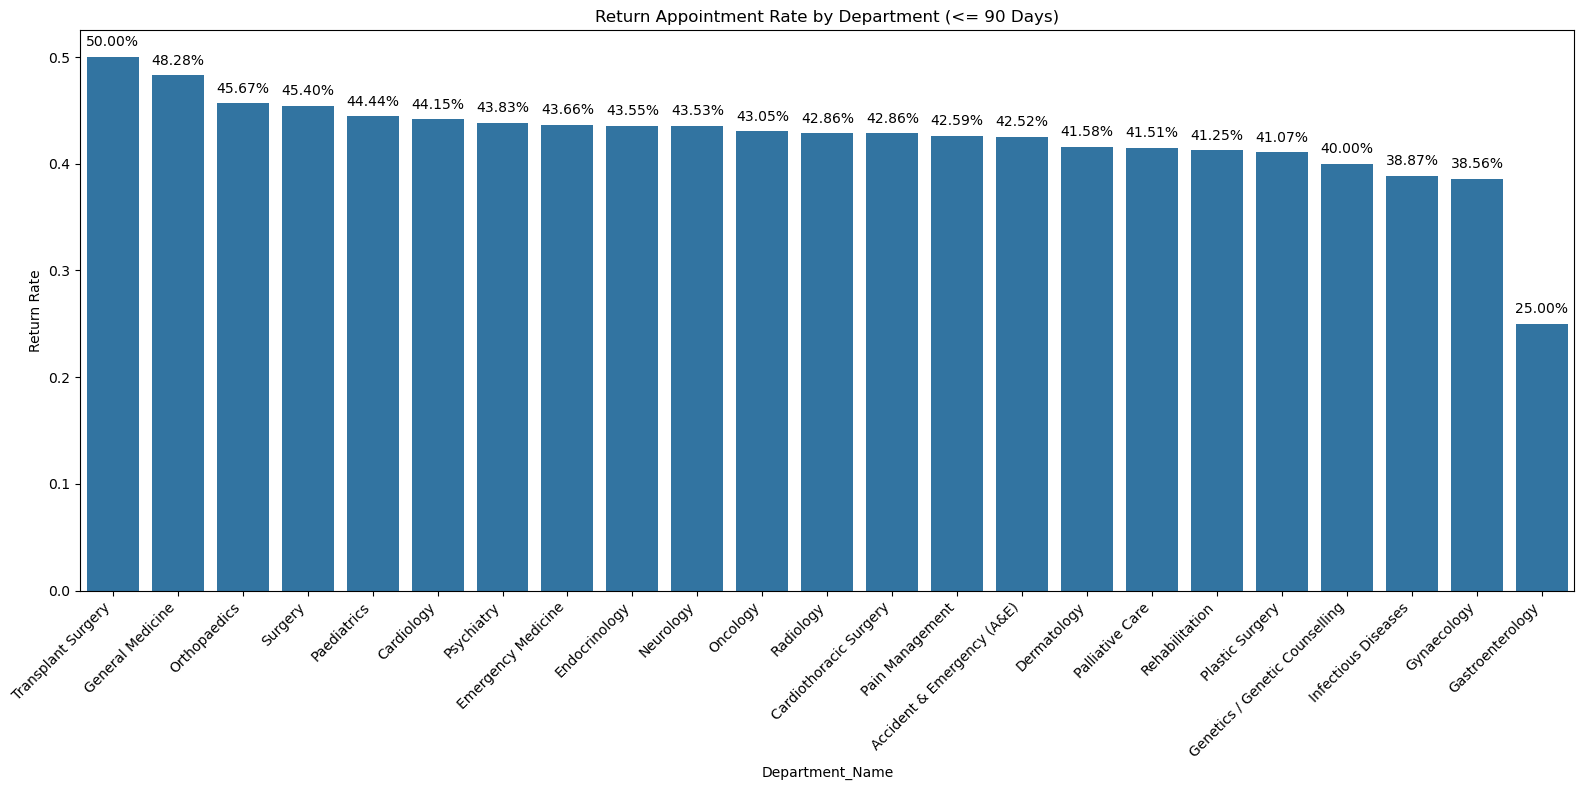


Return Appointment Analysis (Threshold = 180 days):
-------------------------------------------------------------
Null Hypothesis (H0): The likelihood that patients return within 180 days is independent of department.
Alternative Hypothesis (H1): The likelihood that patients return within 180 days depends on department.
-------------------------------------------------------------
Chi2 Statistic: 63.91, Degrees of Freedom: 22, p-value: 0.000006
Result: Reject H0 — Return behavior depends on department.


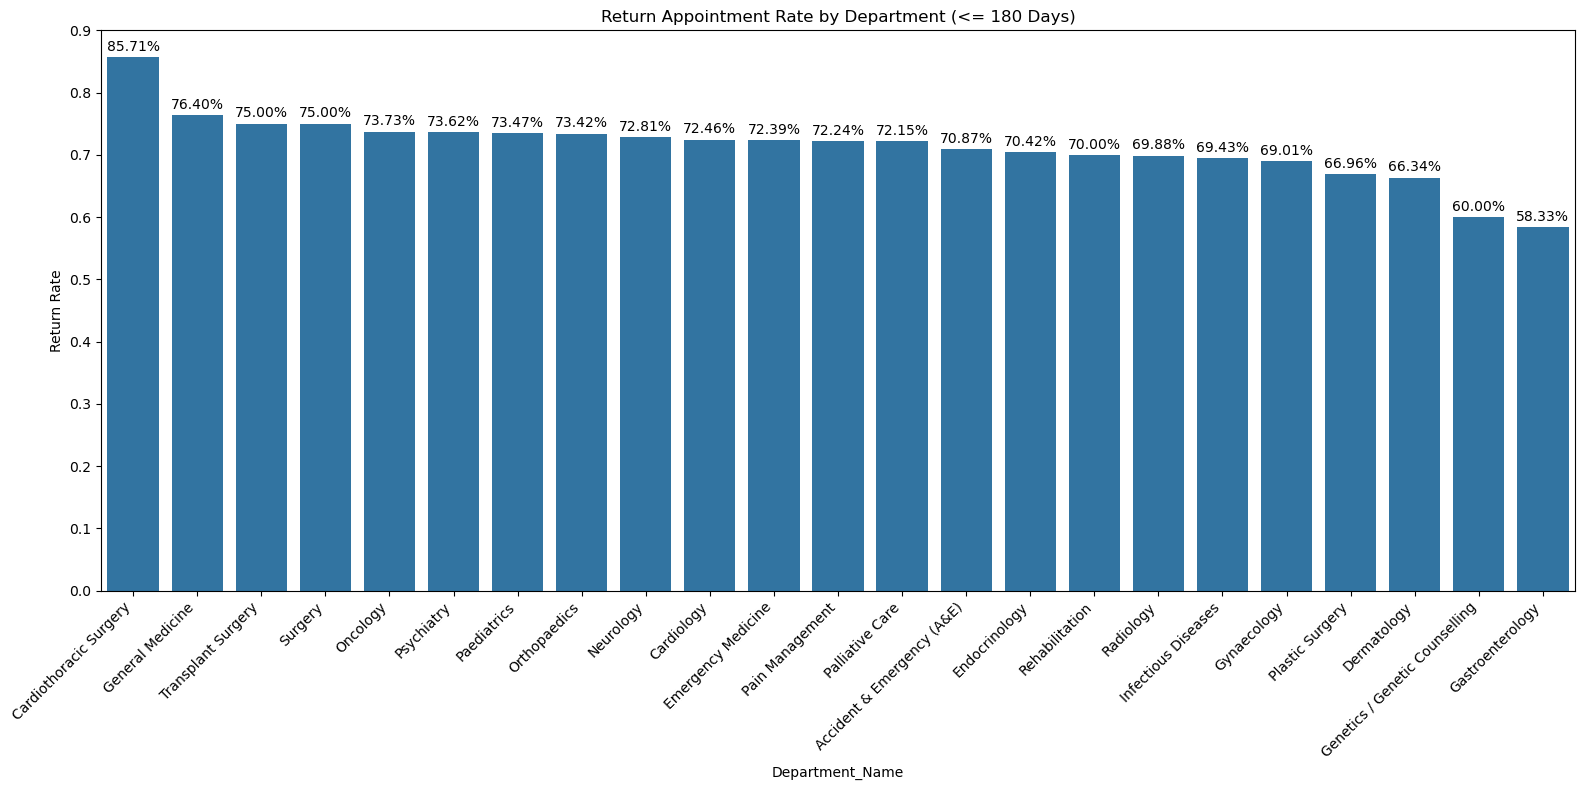

In [45]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Connecting to database
conn = sqlite3.connect('NHS-HealthCare.db')

def analyse(threshold):
    # SQL queries joins multiple tables including Record, Appointment, and Department tables to retrieve appointment dates and department names 
    # per patient.
    query = """
    SELECT 
        R.Patient_ID,
        A.Appointment_Date,
        D.Department_Name
    FROM Record R
    JOIN Appointment A ON R.Appointment_ID = A.Appointment_ID
    JOIN Department D ON A.Department_ID = D.Department_ID
    ORDER BY R.Patient_ID, D.Department_Name, A.Appointment_Date
    """
    
    # Load the SQL Results into DataFrame
    df = pd.read_sql_query(query, conn, parse_dates=['Appointment_Date'])

    # shift() to get previous appointment in same department per patient
    grouped = df.groupby(['Patient_ID', 'Department_Name'])
    df['Prev_Appointment'] = grouped['Appointment_Date'].shift(1)

    # Calculate days between appointments
    df['Days_Between'] = (df['Appointment_Date'] - df['Prev_Appointment']).dt.days

    # Check to see if it's a return within the threshold
    df['Is_Return'] = (df['Days_Between'] <= threshold).astype(int)

    # Drop rows where there's no previous appointment 
    df = df.dropna(subset=['Days_Between'])

    # Build a Chi-square contingency table 
    contingency_table = pd.crosstab(df['Department_Name'], df['Is_Return'])

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Hypothesis test results
    
    print(f"\nReturn Appointment Analysis (Threshold = {threshold} days):")
    print("-------------------------------------------------------------")
    print(f"Null Hypothesis (H0): The likelihood that patients return within {threshold} days is independent of department.")
    print(f"Alternative Hypothesis (H1): The likelihood that patients return within {threshold} days depends on department.")
    print("-------------------------------------------------------------")
    print(f"Chi2 Statistic: {chi2:.2f}, Degrees of Freedom: {dof}, p-value: {p:.6f}")

    if p < 0.05:
        print(f"Result: Reject H0 — Return behavior depends on department.")

        # Visualization
        # Calculate return rate 
        total_counts = contingency_table.sum(axis=1)
        return_counts = contingency_table[1]
        return_rate = (return_counts / total_counts).sort_values(ascending=False)

        # Plotting 
        plt.figure(figsize=(16, 8))
        sns.barplot(x=return_rate.index, y=return_rate.values)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Return Rate')
        plt.title(f'Return Appointment Rate by Department (<= {threshold} Days)')

        for i, v in enumerate(return_rate.values):
            plt.text(i, v + 0.01, f"{v:.2%}", ha='center')
        plt.tight_layout()
        plt.show()
    
    else:
        print("Result: Fail to reject H0 — No strong evidence that department affects return behaviour.")


# Analysis of the soluion for multiple thresholds

Clinically_Justified_Days = [14,30,90,180]
for days in Clinically_Justified_Days:
    analyse(days)


# Solution - 2 : Supervised Learning model - Logistic Regression


## Claim Approval Prediction Analysis

### Problem
NHS aims to improve patient care and support patient-centred decision by predicting the approval status of Insurance claims for service billings based on factors such as claim amount, service billing amount, insurance provider, and coverage type of the insurance provider.

### Solution

* A logistic regression model is used to predict the binary outcome of claim approval status(Approved or Not Approved). 
* Sql queries joins multiple tables including *Claim_Service*, *Service_Billing*, and *Insurance_Provider_Service* tables to retrieve factors needed to predict the approval status. Load SQL results into a Pandas DataFrame.
* Create a binary Approved_flag (1 if *Claim_Status* is Approved, 0 otherwise).
* Encode categorical features like *Insurance_Provider_Name* and *Insurance_Provider_Coverage_Type* into one-hot encoding using get_dummies().
* Standardize the numerical features *Claim_Amount* and *Service_Billing_Amount* using StandardScaler.
* scikit-learn to train model and evaluate performance.
* Train the model with balanced class weights.
* Visualisation to evaluate feature importance.

### Justification

Logistic regression is ideal for binary classification. Coefficients calculated can helps NHS identify which feature influence approvals. As outputs are probabilities, stakeholders can understand the confidence level of the model in its prediction.

### Implementation

*Implemented code is in the code cell below this markdown cell.*

### Results

* The confusion matrix shows 3993 true negatives, 4080 false positives, 4029 false negatives, and 4203 true positives.
* The classification report indicates precision, recall, and F1-score of ~0.50 for both classes, with 50% accuracy (16,305 samples).
* The horizontal bar plot of the top 10 features (including one-hot encoded feature)
* The top 20 predicted vs. actual values to demonstrate model performance.

Although the current model achieves moderate predictive performance, it can serve as a valuable diagnostic tool to support human decision-making instead of making final decisions on its own. Feature importance can help NHS identify key factors influencing claim approvals and enable data-driven policy adjustments.

### Limitations
* Low accuracy limits predictive decision confidence
##### Bias : 
* One-hot encoding creates high-dimensional categorical features for Insurance Provider and coverage types. This can introduce noise.
* The solution only covers Insurance claims for Service billings and not for Medication billings.

##### Assumptions : 
* Logistic regression assumes a linear relationship between the independent features.

##### Areas of Improvement :

* Other models like Random Tree classifier could be considered for introducing non-linearity.
* Model performance may not generalize well to unseen insurance providers. Grouping rare categories can help.



Confusion Matrix:
 [[3993 4080]
 [4029 4203]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.49      0.50      8073
           1       0.51      0.51      0.51      8232

    accuracy                           0.50     16305
   macro avg       0.50      0.50      0.50     16305
weighted avg       0.50      0.50      0.50     16305


Intercept:
[8.48414829e-06]

Coefficients:
[[-0.00583433 -0.00583433 -0.0088475  -0.00239047  0.00686416 -0.00520179
  -0.0051603  -0.00560333 -0.00103585 -0.01076302  0.00455458  0.00455999
  -0.00264734 -0.00149434 -0.00348117  0.01275523  0.00700483 -0.004935
   0.00339364  0.00866975  0.00092078  0.00150923  0.01741122  0.00225684
   0.00358404 -0.00536291  0.00657827  0.0004714  -0.00043111 -0.01204656
   0.00512274  0.00592413 -0.00297263 -0.00259763 -0.00994419 -0.00311786
   0.00031061 -0.00258284 -0.00892192  0.00372871 -0.00013824 -0.00018791
   0.00252917  0.0004714  -0.0088475  -0.0

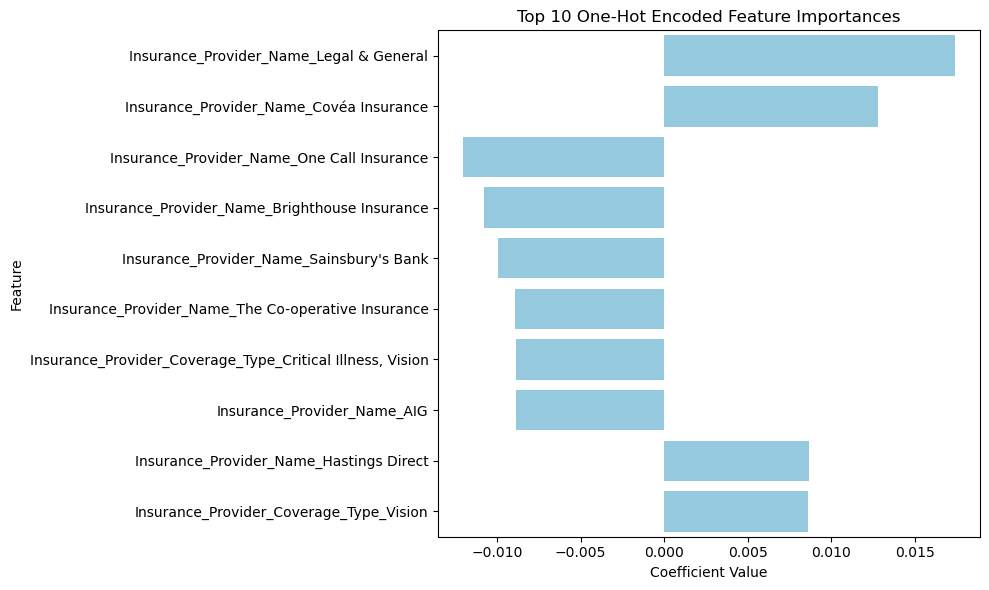

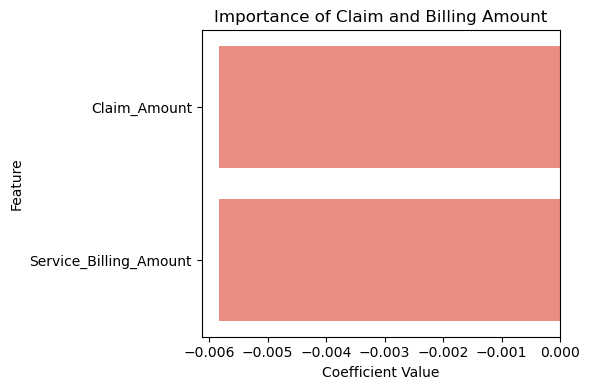

Top 20 Predicted vs Actual Values:
       Actual  Predicted
6946        1          0
28684       0          1
21614       0          0
56263       0          0
1366        1          0
52830       1          0
20280       0          1
74539       1          0
2310        1          1
8311        0          0
59641       1          0
59017       0          0
15399       0          1
18657       0          1
45548       1          0
12044       0          1
53059       1          0
1966        1          1
76115       1          1
65238       1          1


In [46]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Connect to database
conn = sqlite3.connect("NHS-HealthCare.db")

# Sql queries joins multiple tables including *Claim_Service*, *Service_Billing*, and *Insurance_Provider_Service* tables to retrieve
# factors needed to predict the approval status.
query = """
SELECT 
    cs.Claim_Status,
    cs.Claim_Amount,
    sb.Service_Billing_Amount,
    ips.Insurance_Provider_Name,
    ips.Insurance_Provider_Coverage_Type
FROM Claim_Service cs
JOIN Service_Billing sb ON cs.Service_Billing_ID = sb.Service_Billing_ID
JOIN Insurance_Provider_Service ips ON cs.Insurance_Provider_ID = ips.Insurance_Provider_ID
--WHERE cs.Claim_Amount IS NOT NULL AND sb.Service_Billing_Amount IS NOT NULL
"""

# Load SQL Results into DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Create a binary Approved_flag (1 if *Claim_Status* is Approved, 0 otherwise)
df['Approved_flag'] = df['Claim_Status'].apply(lambda x: 1 if x == 'Approved' else 0)

# One-hot encode categorical variables (*Insurance_Provider_Name*,*Insurance_Provider_Coverage_Type*)
df = pd.get_dummies(df, columns=['Insurance_Provider_Name', 'Insurance_Provider_Coverage_Type'])

# Features and target
X = df.drop(columns=['Claim_Status', 'Approved_flag'])
y = df['Approved_flag']

# Split the data into training and testing sets
# Using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling : Standardize the features
# Fit to find mean and std deviation of training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate model performance using confusion matrix and classification report
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Intercept 
print("\nIntercept:")
print(model.intercept_)

# Each feature, including one-hot encoded categories, gets its own coefficient in the model.
print("\nCoefficients:")
print(model.coef_)
print("\n")

# Feature Importance - Plotting

# Get the feature names (including the one-hot encoded categories)
feature_names = X.columns

# Get the coefficients from the model
coefficients = model.coef_.flatten()

# Create a DataFrame for feature importance

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': abs(coefficients)
})


# Filter one-hot encoded features only (exclude Claim_Amount and Service_Billing_Amount)
one_hot_features = feature_importance[
    feature_importance['Feature'].str.contains('Insurance_Provider_Name|Insurance_Provider_Coverage_Type')
]
# Get top 10 based on absolute coefficient values
top_10_one_hot = one_hot_features.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_10_one_hot, color='skyblue')
plt.title('Top 10 One-Hot Encoded Feature Importances')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Filter the numerical features 
core_features = feature_importance[
    feature_importance['Feature'].isin(['Claim_Amount', 'Service_Billing_Amount'])
]

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Coefficient', y='Feature', data=core_features, color='salmon')
plt.title('Importance of Claim and Billing Amount')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Creating a DataFrame for top 20 predicted and actual values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Print top 20 rows of predicted vs actual values
print("Top 20 Predicted vs Actual Values:")
print(comparison_df.head(20))

# Solution 3 : Unsupervised Learning Model - KMeans Clustering


## Patient behaviour analysis

### Problem 

The NHS aims to gain deeper insights into patient behaviour and healthcare service usage by segmenting patients based on their interactions with the healthcare system. This supports personalised treatment plans, identification of high-risk patients and analysis of the effectiveness of different medical interventions.

### Solution

* Implement unsupervised model using KMeans clustering to segment patients based on service utilization.
* SQL queries joins multiple tables including *Record* and *Prescription_Detail* to retrieve and compute relevant features such as number of appointments, tests, surgeries, total medication quantity, total medication billing amount, number of days the medication was prescribed.
* fillna to fill the missing values with 0.
* Log transformation to reduce skew.
* StandardScaler standardizes the features.
* Run KMeans with 3 clusters and print Silhouette Score.
* Visualise the 2D scatter plot using PCA.

### Justification 

Clustering is well-suited for identifying usage patterns in patient behaviour when no predefined labels exist. KMeans was chosen for its efficiency with large datasets. Despite the absence of labeled outcomes KMeans can capture the structure of the data. Even when features are standardized and transformed Kmeans can identify service usage patterns among patients.

### Implementation

*Implemented code is in the code cell below this markdown cell.*

### Results

##### The alogorithm segmented patients into three clusters : 

##### Low-Utilization Group

* This cluster indicates patients with minimal interactions with the healthcare system. These patients have near zero value across all the features.
* They likely include healthy patients.

##### High-Utilization Group 

* This cluster represents patients with the highest averages in number of appointments, tests, medication, total medication costs and medication duration.
* They likely include patients with chronic conditions or complex care needs.

##### Surgery-Focused Group 
* This cluster represents patients who have highest average in surgery count. But they are low on other features.
* They likely indicate patients who had acute surgical interventions without need for significant medication usage.

The insights can help NHS provide targeted care to patients. High-Utilization group may benefit from tailored policies and long-term care plans.
Dedicated professionals can be assigned to Surgery-Focused group. Preintervention measures can be recommended for Low-Utilization group.

### Limitations : 

##### Bias : 
* Feature set doesn't cover demographics of patients.

##### Assumptions : 
* Algorithm assumes 3 clusters is the correct segmentation.
  
##### Areas of Improvement : 
* Algorithm is sensitive to outliers. Methods like Isolation forest or boxplots could be considered.
* If the clusters have complex geometrical shape, K-means does a poor job in clustering . DBSCAN or GMM models could be considered.






Silhouette Score: 0.7328


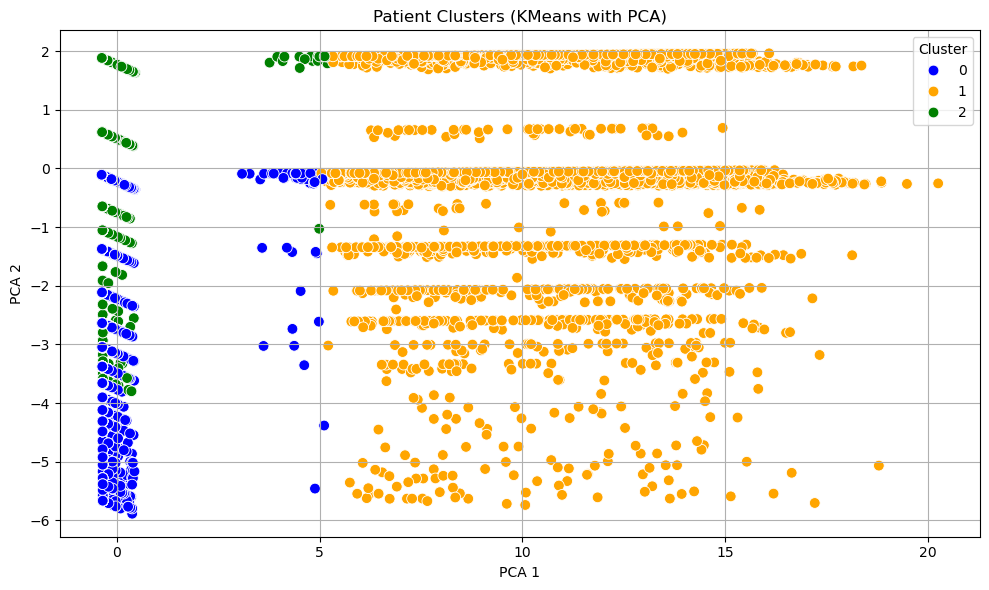


Cluster Averages:
         Num_Appointments  Num_Tests  Num_Surgeries  Num_Medications  \
Cluster                                                                
0                0.776719   0.100918       0.000000         0.000249   
1                1.029718   0.111349       0.107164         1.051819   
2                0.775127   0.096822       0.693147         0.000361   

         Medication_Quantity  Total_Amount  Medication_Days  
Cluster                                                      
0                   0.000281      0.000929         0.000563  
1                   2.208351      5.424421         4.940016  
2                   0.000428      0.001477         0.000904  


In [47]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("NHS-HealthCare.db")

#SQL queries joins multiple tables including *Record* and *Prescription_Detail* to retrieve and compute relevant features such as 
#number of appointments, tests, surgeries, total medication quantity, total medication billing amount, number of days the medication was prescribed.
query = """
SELECT 
    p.Patient_ID,
    COUNT(DISTINCT r.Appointment_ID) AS Num_Appointments,
    COUNT(DISTINCT r.Test_ID) AS Num_Tests,
    COUNT(DISTINCT r.Surgery_ID) AS Num_Surgeries,
    COUNT(DISTINCT pd.Medication_ID) AS Num_Medications,
    SUM(COALESCE(pd.Medication_Quantity, 0)) AS Medication_Quantity,
    ROUND(SUM(COALESCE(pd.Total_Medication_Billing_Amount, 0)), 2) AS Total_Amount,
    ROUND(SUM(
        CASE 
            WHEN pd.Dosage_End_Date IS NOT NULL AND pd.Dosage_Start_Date IS NOT NULL 
            THEN JULIANDAY(pd.Dosage_End_Date) - JULIANDAY(pd.Dosage_Start_Date)
            ELSE 0 
        END
    ), 1) AS Medication_Days
FROM Patient p
LEFT JOIN Record r ON p.Patient_ID = r.Patient_ID
LEFT JOIN prescription_detail pd ON r.Record_ID = pd.Record_ID
GROUP BY p.Patient_ID
"""

# Load SQL Results into pandas dataframe
df = pd.read_sql_query(query, conn)
conn.close()

# Fill nulls (if any) with 0
df.fillna(0, inplace=True)

# Select features
features = [
    'Num_Appointments',
    'Num_Tests',
    'Num_Surgeries',
    'Num_Medications',
    'Medication_Quantity',
    'Total_Amount',
    'Medication_Days'
]

# Filter out patients with no activity at all
df_filtered = df[df[features].sum(axis=1) > 0].copy()

# Log-transform to reduce skew
df_filtered[features] = df_filtered[features].apply(lambda x: np.log1p(x))

# StandardScaler standardizes the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[features])

# Run KMeans clustering with number of cluster predefined to be 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate the cluster separation with silhouette score
score = silhouette_score(X_scaled, df_filtered['Cluster'])
print(f"\nSilhouette Score: {score:.4f}")

# Visulisation

# Reduce dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_filtered['PCA1'] = X_pca[:, 0]
df_filtered['PCA2'] = X_pca[:, 1]

cluster_palette = {0: "blue", 1: "orange", 2: "green"}

# Plot clusters 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette=cluster_palette,
    s=60
)
plt.title("Patient Clusters (KMeans with PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Show cluster-wise averages
print("\nCluster Averages:")
print(df_filtered.groupby('Cluster')[features].mean().round(6))


# Task 4: Ethics and Analysis (10 Marks)

**I.** (**5 marks**) Discuss the ethical implications of your modelling solutions given in Task 3. How can these ethical challenges be mitigated in a real-world NHS setting?
    Your answer to this question must not exceed **200 words**.

# Ethical Challenges and Mitigation 


The modelling solutions in Task 3 involve analysing patient appointments, insurance claims, and healthcare usage, which is classified as special category data under the UK GDPR. Ethical concerns includes patient privacy, data security, fairness, and potential misuse of predictions.

The results from Inferential statistics excludes patients with only one appointment. This may overlook vulnerable individuals who could not return for another appointment. This challenge could be mitigated by recording more thorough visit histories.

Logistic regression model used to predict claim approvals is prone to feature bias, especially from one-hot encoding of insurance provider names and coverage types. This could disadvantage patients associated with rare providers. This challenge could be mitigated by grouping rare categories.

The Clustering model may misclassify individual with unique care needs.
Combining this model with clinical validation and assessing with reviews by healthcare professionals can help.

Fairness should be ensured by bias checks, feature impact analysis, and performance checks across various demographic groups.
Models must ensure fairness, and transpareny while protecting patient rights and ethical standards. Data processing must follow legal bases to support a lawful patient-centered healthcare system. The normalised data and insights obtained from the analysis should be stored securely, access limited to authorised staff.

    
**II.** (**5 marks**) Write a Python script **using SQL** to analyse the database from Task 2 and generate results showing: *(a)* The distribution of hospitals across cities. *(b)* For each hospital, its name, city, the number of departments, and the number of patients who prefer that hospital, using outer join. Sort the hospitals within each city by the number of preferred patients in descending order.

# Hospital Distribution and Patient Analysis

In [48]:
import sqlite3

conn = sqlite3.connect('NHS-HealthCare.db')
cursor = conn.cursor()

query = """
SELECT 
    TRIM(SUBSTR(
        Hospital_Location,
        INSTR(Hospital_Location, ',') + 1,
        INSTR(SUBSTR(Hospital_Location, INSTR(Hospital_Location, ',') + 1), ',') - 1
    )) AS City,
    COUNT(*) AS Hospital_Count
FROM Hospital
GROUP BY City
ORDER BY Hospital_Count DESC;
"""

cursor.execute(query)
results = cursor.fetchall()

for row in results:
    print(f"City: {row[0]} : {row[1]}")

conn.close()


City: London : 93
City: Newcastle : 15
City: Birmingham : 12
City: Leeds : 8
City: Glasgow : 7
City: Sheffield : 6
City: Manchester : 6
City: Edinburgh : 6
City: Bradford : 6
City: Liverpool : 5
City: Bristol : 5
City: Leicester : 4
City: Coventry : 4
City: Cardiff : 4
City: Belfast : 4
City: Wolverhampton : 3
City: Swansea : 3
City: Stoke-on-Trent : 3
City: Southampton : 3
City: Plymouth : 3
City: Nottingham : 3
City: Derby : 3
City: Brighton : 3
City: York : 2
City: Wokingham : 2
City: Telford : 2
City: Swindon : 2
City: Sunderland : 2
City: Southend-on-Sea : 2
City: Slough : 2
City: Reading : 2
City: Oxford : 2
City: Norwich : 2
City: Milton Keynes : 2
City: Middlesbrough : 2
City: Luton : 2
City: Harrow : 2
City: Dundee : 2
City: Aberdeen : 2
City: Woking : 1
City: Wakefield : 1
City: Redditch : 1
City: Preston : 1
City: Hastings : 1
City: Exeter : 1
City: Cheltenham : 1
City: Cambridge : 1
City: Blackpool : 1
City: Basingstoke : 1
City: Ashford : 1


In [49]:
import sqlite3

conn = sqlite3.connect("NHS-HealthCare.db")
cursor = conn.cursor()

query = """
SELECT 
    h.Hospital_Name,
    TRIM(SUBSTR(h.Hospital_Location, INSTR(h.Hospital_Location, ',') + 1,
                INSTR(SUBSTR(h.Hospital_Location, INSTR(h.Hospital_Location, ',') + 1), ',') - 1)) AS City,
    COUNT(DISTINCT d.Department_ID) AS Department_Count,
    COUNT(DISTINCT p.Patient_ID) AS Preferred_Patient_Count
FROM Hospital h
LEFT JOIN Department d ON h.Hospital_ID = d.Hospital_ID
LEFT JOIN Patient p ON h.Hospital_ID = p.Patient_Preferred_Hospital_ID
GROUP BY h.Hospital_ID
ORDER BY City, Preferred_Patient_Count DESC;
"""

cursor.execute(query)
rows = cursor.fetchall()

for row in rows:
    print(f"Hospital: {row[0]}, City: {row[1]}, Departments: {row[2]}, Preferred Patients: {row[3]}")

conn.close()


Hospital: Aberdeen NHS Trust Hospital, City: Aberdeen, Departments: 14, Preferred Patients: 3183
Hospital: Aberdeen General Hospital, City: Aberdeen, Departments: 14, Preferred Patients: 3146
Hospital: Ashford NHS Trust Hospital, City: Ashford, Departments: 14, Preferred Patients: 6333
Hospital: Basingstoke General Hospital, City: Basingstoke, Departments: 14, Preferred Patients: 6378
Hospital: Belfast NHS Trust Hospital, City: Belfast, Departments: 14, Preferred Patients: 1665
Hospital: Belfast Georgina branch NHS Trust Hospital, City: Belfast, Departments: 14, Preferred Patients: 1619
Hospital: Belfast Hugh islands NHS Trust Hospital, City: Belfast, Departments: 14, Preferred Patients: 1617
Hospital: Belfast General Hospital, City: Belfast, Departments: 14, Preferred Patients: 1579
Hospital: Birmingham Teaching Hospital, City: Birmingham, Departments: 14, Preferred Patients: 576
Hospital: Birmingham Kelly parks NHS Trust Hospital, City: Birmingham, Departments: 14, Preferred Patients

## Overall Academic Quality (10 Marks)
10 marks are allocated for the clarity and cohesiveness of your answers (both text and code) across all tasks with appropriate, relevant and effective analysis and presentation of the results.

## Deliverables

You should submit the following to the submission point on VLE Ultra:

1. the SQLite database produced in Task 2;
2. the completed Jupyter notebook (both .ipynb and HTML files) containing solutions for all the tasks. A template has been provided on VLE;
3. any figures or diagrams that are included in your answers in the Jupyter notebook.


For each task where text is required, we have provided guidelines above on the suggested word counts. Exceeding the word count will result in any work beyond the word count being disregarded when assessing.